In [187]:
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
pd.options.display.max_rows

<ipython-input-187-85c258bd2fe0>:9: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth', -1)


In [188]:
import seaborn as sns
import matplotlib.pyplot as plt

# Define Functions

In [189]:
def check_key(key1, key2, length):
    for i in range(length):
        if(key1[i] != key2[i]):
            print('Wrong values:')
            print('\t', key1[i])
            print('\t', key2[i])

# Đọc và merge data từ các thành viên

In [190]:
import pandas as pd

# Link dữ liệu từ file code NPT_crawldata.ipnyb
l_data1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQNvOadU2sLeGfL-Ju9cSbDbhXsQlX0d_hkyvWShlHZU01w5eqAWWdo7O2l7veQbwk_QrQ66R7_OdA3/pub?output=csv'

# Link dữ liệu từ file PTO_crawldata.ipnyb
l_data2 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQ2QDtu6Ju0l0eyGhBgAdBlr-erH1drTk5hLJepl5-b3wSADHMjLdGAu6B5NcNNZxvWoqZphTSSyzkt/pub?output=csv'

# Link dữ liệu từ file DNA_crawl.ipnyb
l_data3 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vSiXeeVdooNoeOx-qBTzQ4FK3pKbCVzogw5FnsLLlDojgoxrfa_11vONLAvd6nmOYb2B1tqslWD0tp1/pub?output=csv'

data1 = pd.read_csv(l_data1)
data2 = pd.read_csv(l_data2)
data3 = pd.read_csv(l_data3)

# Thu thập dữ liệu cho thuộc tính quyết định

In [191]:
data4 = pd.read_excel('https://pxweb.gso.gov.vn:443/sq/60064812-3bdb-4944-8084-b3d7dfa610f0', header=2)
data4.rename(columns={'Unnamed: 0': 'Tinh_thanh'}, inplace=True)

header = data4.columns[1:]
data4 = pd.melt(data4, id_vars='Tinh_thanh', value_vars=header, var_name='Nam', value_name='Tong_ban_le_dich_vu')
data4['Nam'] = list (map(int, data4['Nam']))

In [192]:
data1.info()
data2.info()
data3.info()
data4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tinh_thanh                    504 non-null    object 
 1   Vung                          504 non-null    object 
 2   Nam                           504 non-null    int64  
 3   TL_lao_dong_tren_15           504 non-null    float64
 4   TN_cac_khoan_thu_khac         315 non-null    float64
 5   TN_phinong_lamnghiep_thuysan  315 non-null    float64
 6   TN_nong_lamnghiep_thuysan     315 non-null    float64
 7   TN_tienluong_tiencong         315 non-null    float64
 8   TN_tong_so                    315 non-null    float64
 9   Dat_san_xuat_nong_nghiep      504 non-null    float64
 10  Dat_lam_nghiep                480 non-null    float64
 11  Dat_chuyen_dung               504 non-null    float64
 12  Dat_o                         504 non-null    float64
 13  Loai_

## Xem thuộc tính khoá để merge data

In [193]:
# Thuộc tính khoá 'Tinh_thanh'

key_col11 = data1['Tinh_thanh']
key_col12 = data2['Tinh_thanh']
key_col13 = data3['Tinh_thanh']
key_col14 = data4['Tinh_thanh']

# Thuộc tính khoá 'Nam'
key_col21 = data1['Nam']
key_col22 = data2['Nam']
key_col23 = data3['Nam']
key_col24 = data4['Nam']

key_cols = np.array([[key_col11, key_col12, key_col13, key_col14], 
                     [key_col21, key_col22, key_col23, key_col24]])
for i in range(0, 3):
    for j in range(i+1, 4):
        print(f'Kiểm tra data{i+1} và data{j+1}')
        check_key(key_cols[0][i], key_cols[0][j], 504)
        check_key(key_cols[1][i], key_cols[1][j], 504)
        
# Giá trị thuộc tính khoá "Tinh_thanh" có khác nhau vì kí hiệu, không khác nhau về giá trị
# Giá trị thuộc tính khoá "Nam" không bị sai lệch

Kiểm tra data1 và data2
Wrong values:
	 Thừa Thiên Huế
	 Thừa Thiên - Huế
Wrong values:
	 Bà Rịa - Vũng Tàu
	 Bà Rịa-Vũng Tàu
Wrong values:
	 TP.Hồ Chí Minh
	 TP. Hồ Chí Minh
Wrong values:
	 Thừa Thiên Huế
	 Thừa Thiên - Huế
Wrong values:
	 Bà Rịa - Vũng Tàu
	 Bà Rịa-Vũng Tàu
Wrong values:
	 TP.Hồ Chí Minh
	 TP. Hồ Chí Minh
Wrong values:
	 Thừa Thiên Huế
	 Thừa Thiên - Huế
Wrong values:
	 Bà Rịa - Vũng Tàu
	 Bà Rịa-Vũng Tàu
Wrong values:
	 TP.Hồ Chí Minh
	 TP. Hồ Chí Minh
Wrong values:
	 Thừa Thiên Huế
	 Thừa Thiên - Huế
Wrong values:
	 Bà Rịa - Vũng Tàu
	 Bà Rịa-Vũng Tàu
Wrong values:
	 TP.Hồ Chí Minh
	 TP. Hồ Chí Minh
Wrong values:
	 Thừa Thiên Huế
	 Thừa Thiên - Huế
Wrong values:
	 Bà Rịa - Vũng Tàu
	 Bà Rịa-Vũng Tàu
Wrong values:
	 TP.Hồ Chí Minh
	 TP. Hồ Chí Minh
Wrong values:
	 Thừa Thiên Huế
	 Thừa Thiên - Huế
Wrong values:
	 Bà Rịa - Vũng Tàu
	 Bà Rịa-Vũng Tàu
Wrong values:
	 TP.Hồ Chí Minh
	 TP. Hồ Chí Minh
Wrong values:
	 Thừa Thiên Huế
	 Thừa Thiên - Huế
Wrong values:
	 Bà R

	 TP. Hồ Chí Minh
Wrong values:
	 Kiên Giang
	 Kiên  Giang
Wrong values:
	 Thái Nguyên
	 Thái  Nguyên
Wrong values:
	 Hoà Bình
	 Hòa Bình
Wrong values:
	 Thanh Hoá
	 Thanh Hóa
Wrong values:
	 Thừa Thiên Huế
	 Thừa Thiên-Huế
Wrong values:
	 Quảng Nam
	 Quảng  Nam
Wrong values:
	 Quảng Ngãi
	 Quảng  Ngãi
Wrong values:
	 Khánh Hoà
	 Khánh  Hòa
Wrong values:
	 Ninh Thuận
	 Ninh  Thuận
Wrong values:
	 Bình Dương
	 Bình  Dương
Wrong values:
	 TP.Hồ Chí Minh
	 TP. Hồ Chí Minh
Wrong values:
	 Kiên Giang
	 Kiên  Giang


In [194]:
# Đồng bộ ký hiệu cho các giá trị trong thuộc tính khoá
col_tinh_thanh = list(data1.loc[:, 'Tinh_thanh'])

data1['Tinh_thanh'] = col_tinh_thanh
data2['Tinh_thanh'] = col_tinh_thanh
data3['Tinh_thanh'] = col_tinh_thanh
data4['Tinh_thanh'] = col_tinh_thanh

In [195]:
dataset = pd.merge(data1, data2, how="inner", on=['Tinh_thanh', 'Nam'])
dataset = pd.merge(dataset, data3, how="inner", on=['Tinh_thanh', 'Nam'])
dataset = pd.merge(dataset, data4, how="inner", on=['Tinh_thanh', 'Nam'])
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tinh_thanh                    504 non-null    object 
 1   Vung                          504 non-null    object 
 2   Nam                           504 non-null    int64  
 3   TL_lao_dong_tren_15           504 non-null    float64
 4   TN_cac_khoan_thu_khac         315 non-null    float64
 5   TN_phinong_lamnghiep_thuysan  315 non-null    float64
 6   TN_nong_lamnghiep_thuysan     315 non-null    float64
 7   TN_tienluong_tiencong         315 non-null    float64
 8   TN_tong_so                    315 non-null    float64
 9   Dat_san_xuat_nong_nghiep      504 non-null    float64
 10  Dat_lam_nghiep                480 non-null    float64
 11  Dat_chuyen_dung               504 non-null    float64
 12  Dat_o                         504 non-null    float64
 13  Loai_

# Đổi đơn vị cho các thuộc tính 'Doanh_thu_du_lich' và 'Tong_ban_le_dich_vu. Chuyển từ tỷ đồng sang nghìn đồng

In [196]:
dataset['Doanh_thu_du_lich'] = dataset['Doanh_thu_du_lich']*10e6
dataset['Tong_ban_le_dich_vu'] = dataset['Tong_ban_le_dich_vu']*10e6

# Xử lý missing value cho các thuộc tính về thu nhập bình quân theo tháng 

## Xem xét chênh lệch thu nhập giữa các năm

In [197]:
data_1 = dataset.iloc[:, [0, 2, 4, 5, 6, 7, 8]]
datagr_1 = data1.groupby(by=['Nam']).describe() 

***===> Hướng xử lý mising: Sau khi quan sát sự chênh lệch thu nhập giữa các năm, nhóm quyết định lấy trung bình cộng của 2 năm gần nhất cho giá trị bị khuyết***

<AxesSubplot:xlabel='Nam', ylabel='TN_cac_khoan_thu_khac'>

<AxesSubplot:xlabel='Nam', ylabel='TN_phinong_lamnghiep_thuysan'>

<AxesSubplot:xlabel='Nam', ylabel='TN_nong_lamnghiep_thuysan'>

<AxesSubplot:xlabel='Nam', ylabel='TN_tienluong_tiencong'>

<AxesSubplot:xlabel='Nam', ylabel='TN_tong_so'>

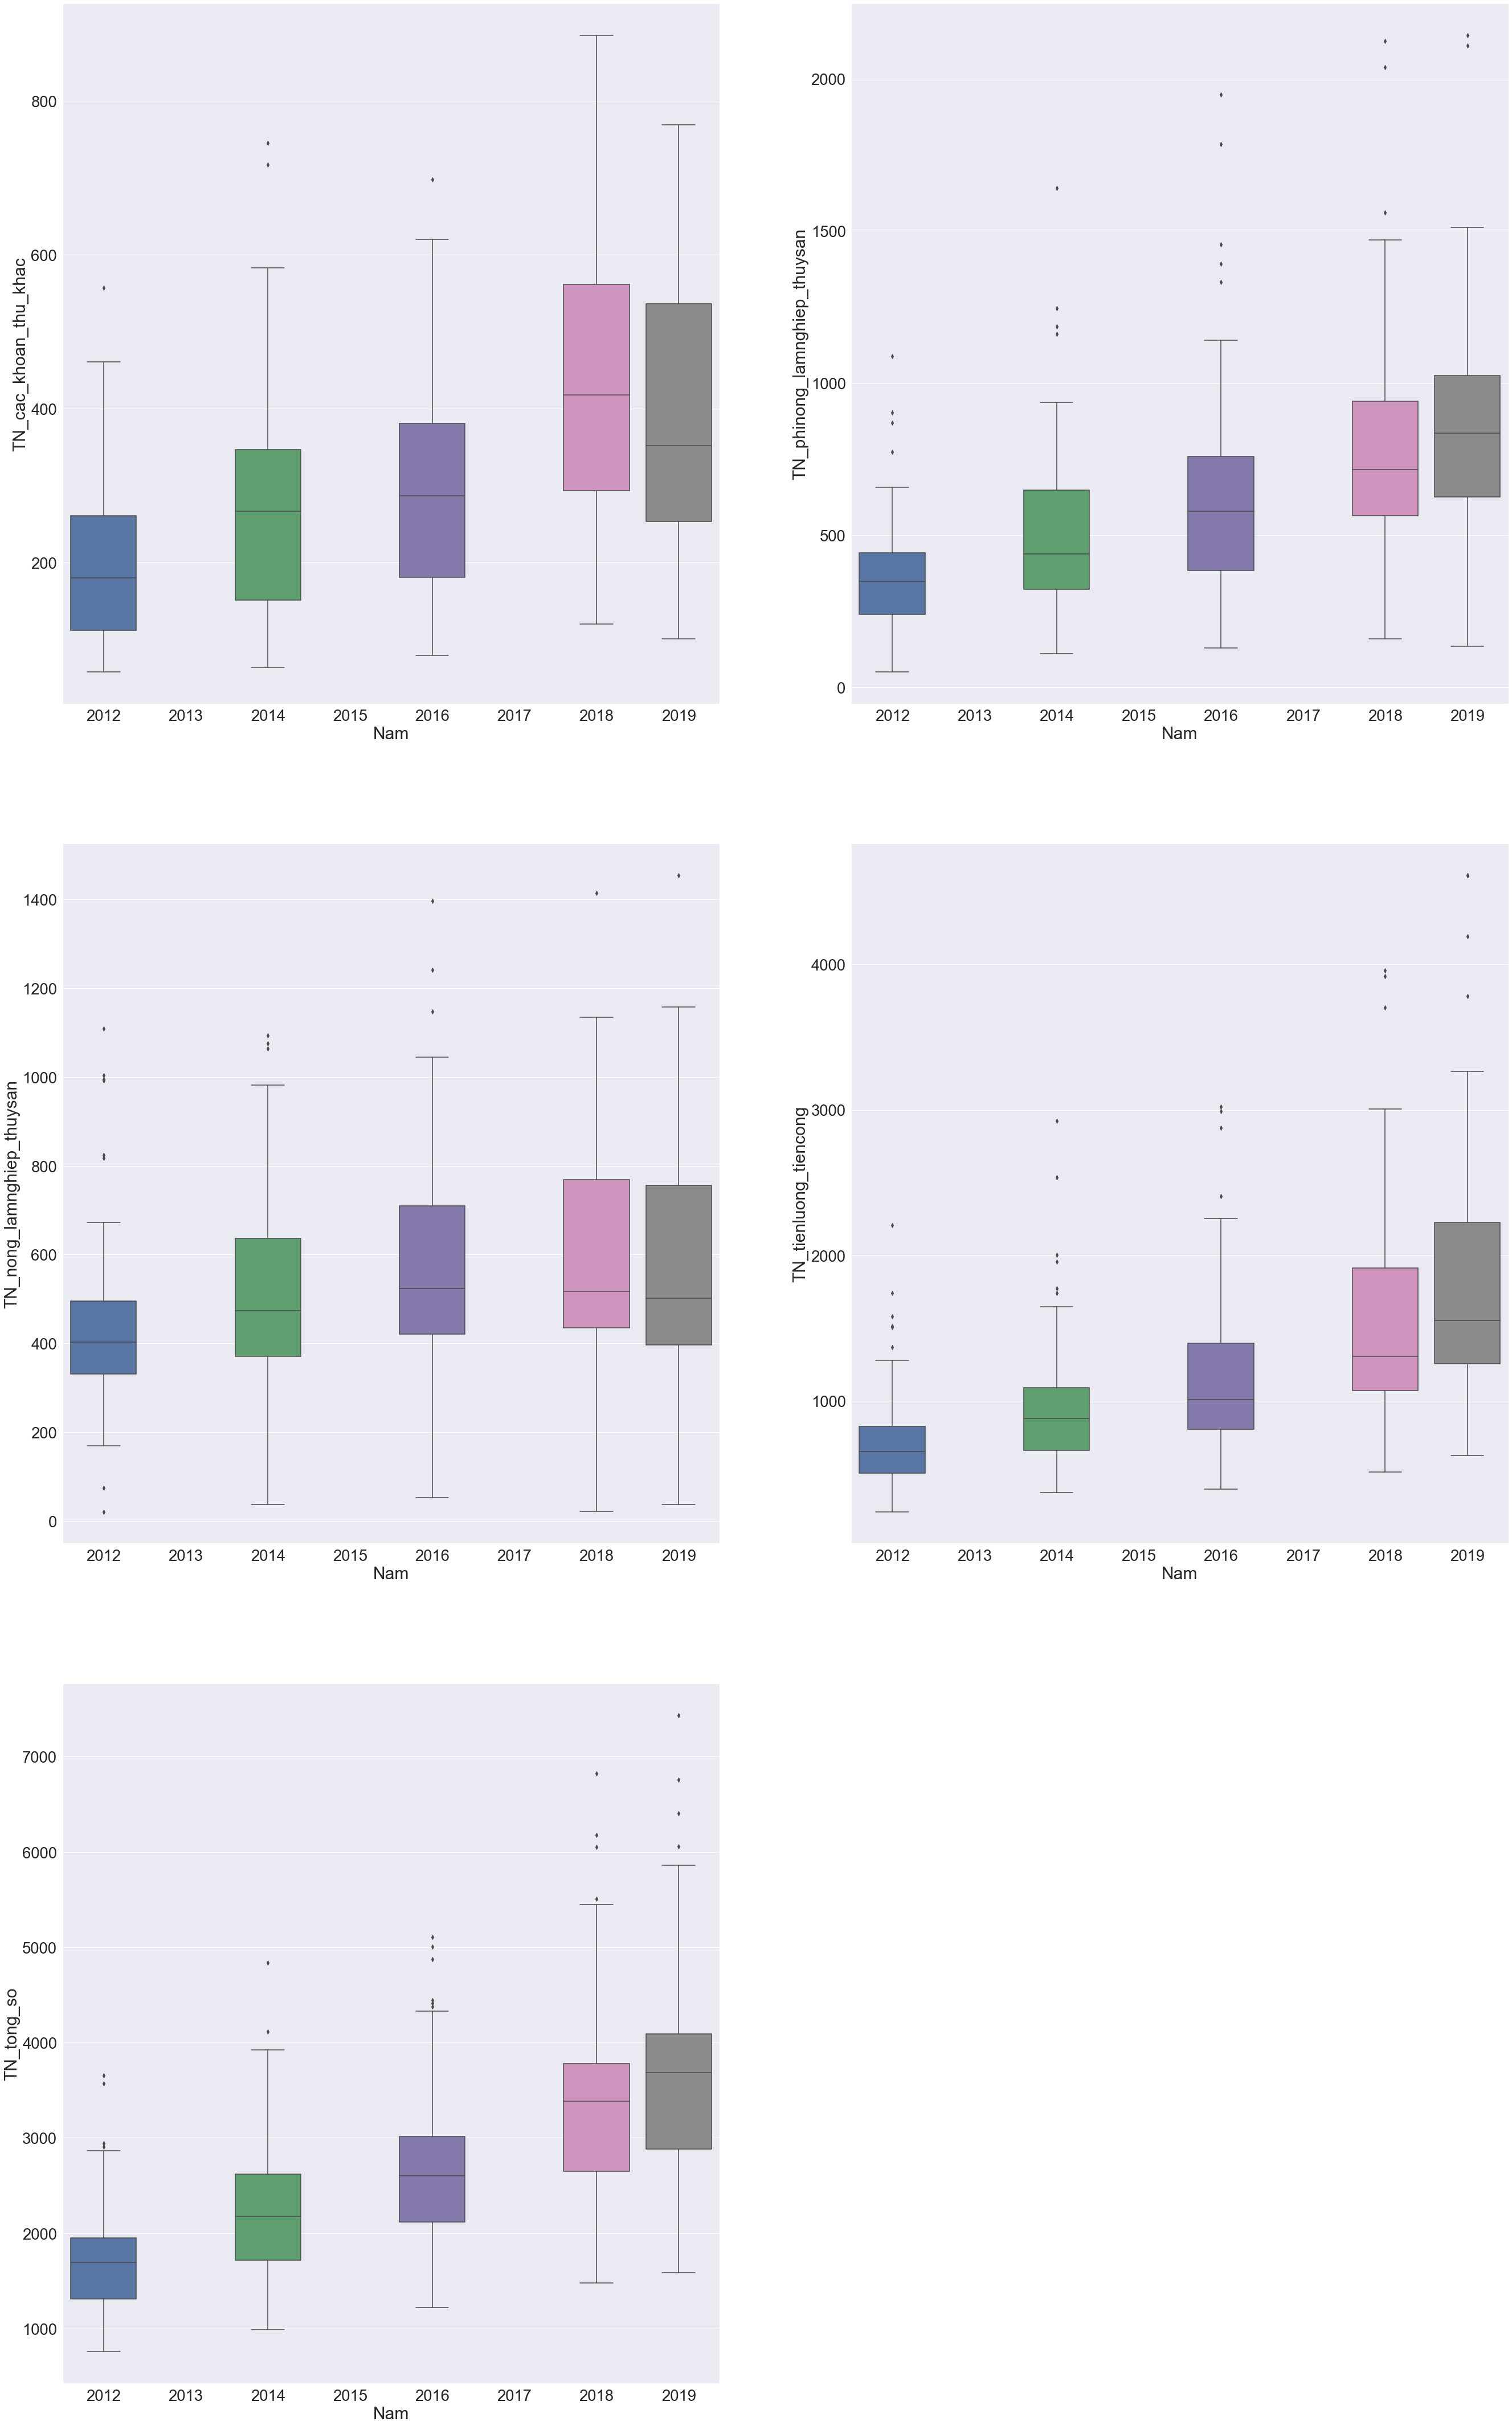

In [198]:
# Trực quan các thuộc tính để điền mising
f = ['TN_cac_khoan_thu_khac', 'TN_phinong_lamnghiep_thuysan', 
                                                'TN_nong_lamnghiep_thuysan', 'TN_tienluong_tiencong', 'TN_tong_so']
figure = plt.figure(figsize=(6, 2))
figure.tight_layout()
for i, j in zip(f, range(1, 6)):    
    sns.set(font_scale=2.5)
    axe = figure.add_subplot(3, 2, j)
    sns.boxplot(x='Nam', y=i, data=data_1)
    plt.subplots_adjust(right=6, bottom=1, top=30)

***===> Hướng xử lý mising: Sau khi quan sát sự chênh lệch thu nhập giữa các năm, nhóm quyết định lấy trung bình cộng của 2 năm gần nhất cho giá trị bị khuyết***

## Xử lý dữ liệu và điền missing

In [199]:
fl_thu_nhap_binh_quan = ['TN_cac_khoan_thu_khac', 'TN_phinong_lamnghiep_thuysan', 
                                                'TN_nong_lamnghiep_thuysan', 'TN_tienluong_tiencong', 'TN_tong_so']
value_bef = dataset[fl_thu_nhap_binh_quan]

In [200]:
# Chuẩn bị data

fl_thu_nhap_binh_quan = ['TN_cac_khoan_thu_khac', 'TN_phinong_lamnghiep_thuysan', 
                                                'TN_nong_lamnghiep_thuysan', 'TN_tienluong_tiencong', 'TN_tong_so']
nam_missing = [2013, 2015, 2017]

# Tạo dataframe lưu thông tin dữ liệu cho các năm bị missing
value_2013 = pd.DataFrame()
value_2015 = pd.DataFrame()
value_2017 = pd.DataFrame()

list_value = []
list_value.append(value_2013)
list_value.append(value_2015)
list_value.append(value_2017)

list_replaced_col = []

for n in nam_missing:
    value_bef = dataset.loc[dataset['Nam']==n-1, fl_thu_nhap_binh_quan]
    value_aft = dataset.loc[dataset['Nam']==n+1, fl_thu_nhap_binh_quan]
    
    for f in fl_thu_nhap_binh_quan:
        value_mean = (np.array(value_bef[f]) + np.array(value_aft[f]))/2
        dataset.loc[dataset['Nam']==n, f] = value_mean

# Xử lý missing value cho thuộc tính 'Dat_lam_nghiep'

## Xem xét giá trị missing của thuộc tính

In [201]:
data_2 = dataset.loc[dataset['Dat_lam_nghiep'].isna(), ['Tinh_thanh', 'Nam', 'Dat_lam_nghiep']]
datagr_2 = data_2.groupby(by=['Tinh_thanh','Nam'])
datagr_2.describe()

Dat_lam_nghiep                             
                         count mean std min 25% 50% 75% max
Tinh_thanh Nam                                             
Cần Thơ    2012  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2013  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2014  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2015  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2016  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2017  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2018  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2019  0.0           NaN  NaN NaN NaN NaN NaN NaN
Hưng Yên   2012  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2013  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2014  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2015  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2016  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2017  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2018  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2019  0.0           NaN  NaN NaN NaN NaN NaN NaN
Vĩnh Long  2012  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2013  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2014  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2015  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2016  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2017  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2018  0.0           NaN  NaN NaN NaN NaN NaN NaN
           2019  0.0           NaN  NaN NaN NaN NaN NaN NaN

***===>Hướng xử lý: Sau khi nhóm tìm hiểu về cơ cấu sử dụng đất ở các tỉnh "Hưng Yên", "Vĩnh Long", "Cần Thơ", ta thấy ở các tỉnh này không có phân bố đất lâm nghiệp. Điền giá trị missing cho thuộc tính này là 0***

## Xử lý dữ liệu và điền missing

In [202]:
dataset['Dat_lam_nghiep'].fillna(0, inplace=True)

# Xử lý missing cho thuộc tính "TL_tot_nghiep_THPT"

## Điền giá trị missing

In [203]:
# Tính chênh lệch trung bình giữa 2 năm liên tiếp theo tỉnh. 
# Sau đó lấy giá trị trung bình chênh lệnh cộng vào giá trị của năm trước đó để điền missing value
data_3 = dataset.loc[:, ['Tinh_thanh', 'Nam', 'TL_tot_nghiep_THPT']]
data_3 = data_3.groupby(by='Nam')

value_dict = {}
nam = dataset['Nam'].unique()

for n in nam:
    if (data_3.get_group(n)['TL_tot_nghiep_THPT'].isna().sum()):
        data_3_curr = dataset.loc[dataset['Nam']==n, 'TL_tot_nghiep_THPT'].values
        data_3_last = dataset.loc[dataset['Nam']==n-1, 'TL_tot_nghiep_THPT'].values
        diff = data_3_curr / data_3_last
        diff_mean = round(np.nanmean(diff), 2)
        value_dict[n] = diff_mean

In [204]:
data_missing = dataset.loc[dataset['TL_tot_nghiep_THPT'].isna(), :].reset_index()

for i in range(data_missing.shape[0]):
    Tinh_thanh = data_missing.iloc[i]['Tinh_thanh']
    Nam = data_missing.iloc[i]['Nam']
    index = data_missing.iloc[i]['index']
    
    value = dataset.loc[index-63, 'TL_tot_nghiep_THPT'] * value_dict[Nam]
    dataset.loc[index, 'TL_tot_nghiep_THPT'] = value

In [205]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tinh_thanh                    504 non-null    object 
 1   Vung                          504 non-null    object 
 2   Nam                           504 non-null    int64  
 3   TL_lao_dong_tren_15           504 non-null    float64
 4   TN_cac_khoan_thu_khac         504 non-null    float64
 5   TN_phinong_lamnghiep_thuysan  504 non-null    float64
 6   TN_nong_lamnghiep_thuysan     504 non-null    float64
 7   TN_tienluong_tiencong         504 non-null    float64
 8   TN_tong_so                    504 non-null    float64
 9   Dat_san_xuat_nong_nghiep      504 non-null    float64
 10  Dat_lam_nghiep                504 non-null    float64
 11  Dat_chuyen_dung               504 non-null    float64
 12  Dat_o                         504 non-null    float64
 13  Loai_

# Xử lý missing value cho thuộc tính 'Doanh_thu_du_lich'

## Xem xét giá trị missing của thuộc tính

In [206]:
data_4 = dataset[['Tinh_thanh', 'Nam', 'Doanh_thu_du_lich']]
data_4_missing = data_4.loc[data_4['Doanh_thu_du_lich'].isna(), :]

In [207]:
missing_4 = data_4_missing['Tinh_thanh'].unique() # Các tỉnh thành có giá trị missing
datagr_4 = data_4.groupby(by='Tinh_thanh')
for t in missing_4:
    datagr_4.get_group(t)

Tinh_thanh   Nam  Doanh_thu_du_lich
13   Bắc Kạn    2012 NaN               
76   Bắc Kạn    2013  1000000.0        
139  Bắc Kạn    2014  1000000.0        
202  Bắc Kạn    2015  2000000.0        
265  Bắc Kạn    2016  200000.0         
328  Bắc Kạn    2017  200000.0         
391  Bắc Kạn    2018  1000000.0        
454  Bắc Kạn    2019  1000000.0

Tinh_thanh   Nam  Doanh_thu_du_lich
22   Lai Châu   2012 NaN               
85   Lai Châu   2013 NaN               
148  Lai Châu   2014  14000000.0       
211  Lai Châu   2015  16000000.0       
274  Lai Châu   2016  21000000.0       
337  Lai Châu   2017  22000000.0       
400  Lai Châu   2018  22000000.0       
463  Lai Châu   2019  24000000.0

Tinh_thanh   Nam  Doanh_thu_du_lich
59   Hậu Giang  2012 NaN               
122  Hậu Giang  2013  40000000.0       
185  Hậu Giang  2014  26000000.0       
248  Hậu Giang  2015  16000000.0       
311  Hậu Giang  2016  12000000.0       
374  Hậu Giang  2017  12000000.0       
437  Hậu Giang  2018  200000.0         
500  Hậu Giang  2019  0.0

Tinh_thanh   Nam  Doanh_thu_du_lich
61   Bạc Liêu   2012 NaN               
124  Bạc Liêu   2013 NaN               
187  Bạc Liêu   2014 NaN               
250  Bạc Liêu   2015 NaN               
313  Bạc Liêu   2016  30000000.0       
376  Bạc Liêu   2017  34000000.0       
439  Bạc Liêu   2018  44000000.0       
502  Bạc Liêu   2019  50000000.0

Tinh_thanh   Nam  Doanh_thu_du_lich
24   Hoà Bình   2012  2000000.0        
87   Hoà Bình   2013 NaN               
150  Hoà Bình   2014 NaN               
213  Hoà Bình   2015  15000000.0       
276  Hoà Bình   2016  18000000.0       
339  Hoà Bình   2017  20000000.0       
402  Hoà Bình   2018  22000000.0       
465  Hoà Bình   2019  24000000.0

Tinh_thanh   Nam  Doanh_thu_du_lich
21   Điện Biên  2012  9000000.0        
84   Điện Biên  2013  1000000.0        
147  Điện Biên  2014 NaN               
210  Điện Biên  2015 NaN               
273  Điện Biên  2016 NaN               
336  Điện Biên  2017 NaN               
399  Điện Biên  2018 NaN               
462  Điện Biên  2019 NaN

Tinh_thanh   Nam  Doanh_thu_du_lich
16   Yên Bái    2012  4000000.0        
79   Yên Bái    2013  7000000.0        
142  Yên Bái    2014  5000000.0        
205  Yên Bái    2015 NaN               
268  Yên Bái    2016  14000000.0       
331  Yên Bái    2017  15000000.0       
394  Yên Bái    2018  27000000.0       
457  Yên Bái    2019  30000000.0

## Xử lý dữ liệu và điền missing

### Define Function

In [208]:
# Miss 2 năm liên tiếp trước đó
def condition_1(data, feature, n):
    early = data.loc[data['Nam']==n+1, feature].values
    early_ = data.loc[data['Nam']==n+2, feature].values
    if(pd.isna(early) or pd.isna(early_)):
        return False
    else:
        return True

# Miss năm giữa 2 năm 
def condition_2(data, feature, n):
    last = data.loc[data['Nam']==n-1, feature].values
    early = data.loc[data['Nam']==n+1, feature].values
    if(pd.isna(last) or pd.isna(early)):
        return False
    else:
        return True

# Miss 2 năm trước đó
def condition_3(data, feature, n):
    last = data.loc[data['Nam']==n-1, feature].values
    last_ = data.loc[data['Nam']==n-2, feature].values
    if(pd.isna(last) or pd.isna(last_)):
        return False
    else:
        return True
    
def condition(data, feature, n):
    if(n==2012):
        if(condition_1(data, feature, n)):
            return 1
    elif(n==2013):
        if(condition_2(data, feature, n)):
            return 2
        elif(condition_1(data, feature, n)):
            return 1
    elif(n==2018):
        if(condition_2(data, feature, n)):
            return 2
        elif(condition_3(data, feature, n)):
            return 3
    elif(n==2019):
        if(condition_3(data, feature, n)):
            return 3            
    else:
        if(condition_2(data, feature, n)):
            return 2
        elif(condition_1(data, feature, n)):
            return 1
        elif(condition_3(data, feature, n)):
            return 3
    return 0 

def cal_mean(cond, data, feature, n):
    if(cond==1):
        early = float(data.loc[data['Nam']==n+1, feature])
        early_ = float(data.loc[data['Nam']==n+2, feature])
        return (2 * early - early_)
    elif(cond==2):
        last = data.loc[data['Nam']==n-1, feature]
        early = data.loc[data['Nam']==n+1, feature]
        print(type(np.mean([last, early])))
        return np.mean([last, early])        
    elif(cond==3):
        last = float(data.loc[data['Nam']==n-1, feature])
        last_ = float(data.loc[data['Nam']==n-2, feature])
        return (2 * last - last_)   

### Chuẩn bị dữ liệu

In [209]:
value = {}
nam = dataset['Nam'].unique()
for t in missing_4:
    df = datagr_4.get_group(t).copy()
    nam_missing = df.loc[df['Doanh_thu_du_lich'].isna(), 'Nam']
    dictionary = {}
    remain = []
    for n in nam_missing:
        cond = condition(df, 'Doanh_thu_du_lich', n)
        if(cond):
            mean_value = round (cal_mean(cond, df, 'Doanh_thu_du_lich', n), 2)
            if mean_value < 0:
                mean_value = min(df.loc[:, 'Doanh_thu_du_lich'])
            df.loc[df['Nam']==n, 'Doanh_thu_du_lich'] = mean_value
            dictionary[n] = mean_value
        else:
            remain.append(n)
    if(len(remain)):
        for i in range(len(remain)-1, -1, -1):
            cond = condition(df, 'Doanh_thu_du_lich', remain[i])   
            mean_value = round (cal_mean(cond, df, 'Doanh_thu_du_lich', remain[i]), 2)
            if mean_value < 0:
                mean_value = min(df.loc[:, 'Doanh_thu_du_lich'])
            df.loc[df['Nam']==remain[i], 'Doanh_thu_du_lich'] = mean_value
            dictionary[remain[i]] = mean_value
        
    value[t] = dictionary

<class 'numpy.float64'>
<class 'numpy.float64'>


### Điền giá trị missing

In [210]:
for t in value.keys():
    for n in value[t].keys():
        dataset.loc[(dataset['Tinh_thanh']==t) & (dataset['Nam']==n ), 'Doanh_thu_du_lich'] = value[t][n]

In [211]:
dataset.loc[dataset['Tinh_thanh'].isin(['Bắc Kạn', 'Lai Châu', 'Điện Biên', 'Hậu Giang', 'Hòa Bình', 'Yên Bái']), ['Tinh_thanh', 'Nam', 'Doanh_thu_du_lich']]

Tinh_thanh   Nam  Doanh_thu_du_lich
13   Bắc Kạn    2012  1000000.0        
16   Yên Bái    2012  4000000.0        
21   Điện Biên  2012  9000000.0        
22   Lai Châu   2012  10000000.0       
59   Hậu Giang  2012  54000000.0       
76   Bắc Kạn    2013  1000000.0        
79   Yên Bái    2013  7000000.0        
84   Điện Biên  2013  1000000.0        
85   Lai Châu   2013  12000000.0       
122  Hậu Giang  2013  40000000.0       
139  Bắc Kạn    2014  1000000.0        
142  Yên Bái    2014  5000000.0        
147  Điện Biên  2014  1000000.0        
148  Lai Châu   2014  14000000.0       
185  Hậu Giang  2014  26000000.0       
202  Bắc Kạn    2015  2000000.0        
205  Yên Bái    2015  9500000.0        
210  Điện Biên  2015  1000000.0        
211  Lai Châu   2015  16000000.0       
248  Hậu Giang  2015  16000000.0       
265  Bắc Kạn    2016  200000.0         
268  Yên Bái    2016  14000000.0       
273  Điện Biên  2016  1000000.0        
274  Lai Châu   2016  21000000.0       
311  Hậu Giang  2016  12000000.0       
328  Bắc Kạn    2017  200000.0         
331  Yên Bái    2017  15000000.0       
336  Điện Biên  2017  1000000.0        
337  Lai Châu   2017  22000000.0       
374  Hậu Giang  2017  12000000.0       
391  Bắc Kạn    2018  1000000.0        
394  Yên Bái    2018  27000000.0       
399  Điện Biên  2018  1000000.0        
400  Lai Châu   2018  22000000.0       
437  Hậu Giang  2018  200000.0         
454  Bắc Kạn    2019  1000000.0        
457  Yên Bái    2019  30000000.0       
462  Điện Biên  2019  1000000.0        
463  Lai Châu   2019  24000000.0       
500  Hậu Giang  2019  0.0

# Xử lý missing value cho thuộc tính 'Bac_si'

## Xem xét missing value của thuộc tính

<Figure size 648x648 with 0 Axes>

<AxesSubplot:xlabel='Nam', ylabel='Giuong_benh'>

Text(0.5, 1.0, 'Giuong_benh vs Nam')

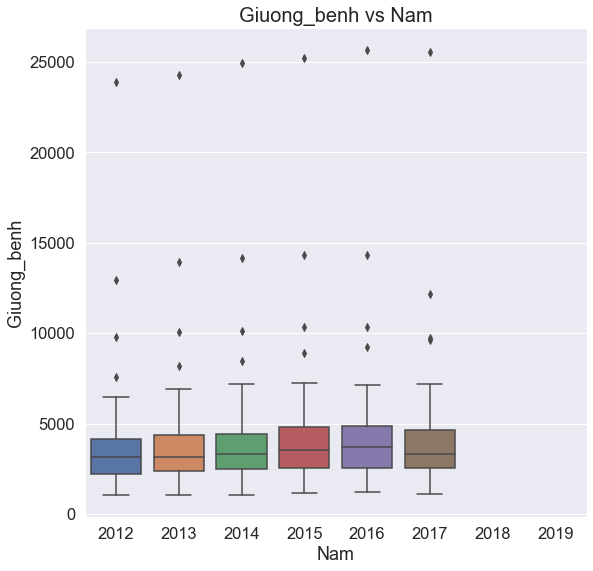

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
n=len(f)
plt.figure(figsize=(9, 9))
sns.set(font_scale=1.5)
sns.boxplot(x='Nam', y='Giuong_benh', data=dataset)
plt.title('Giuong_benh vs Nam', fontsize = 20)

In [213]:
data_5 = dataset[['Tinh_thanh', 'Nam', 'Bac_si', 'Giuong_benh']]
datagr_5 = data_5.groupby(by='Tinh_thanh')

data_5_missing_bacsi = data_5[data_5['Bac_si'].isna()]
data_5_missing_giuongbenh = data_5[data_5['Giuong_benh'].isna()]

missing_5_Bac_si = data_5_missing_bacsi['Tinh_thanh'].unique() # Các tỉnh thành có giá trị missing
missing_5_Giuong_benh = data_5_missing_giuongbenh['Tinh_thanh'].unique() # Các tỉnh thành có giá trị missing

ft = {}
ft['Bac_si'] = missing_5_Bac_si
ft['Giuong_benh'] = missing_5_Giuong_benh

In [214]:
data_5_missing_bacsi

Tinh_thanh   Nam  Bac_si  Giuong_benh
378  Hà Nội             2018 NaN     NaN         
379  Vĩnh Phúc          2018 NaN     NaN         
380  Bắc Ninh           2018 NaN     NaN         
381  Quảng Ninh         2018 NaN     NaN         
382  Hải Dương          2018 NaN     NaN         
383  Hải Phòng          2018 NaN     NaN         
384  Hưng Yên           2018 NaN     NaN         
385  Thái Bình          2018 NaN     NaN         
386  Hà Nam             2018 NaN     NaN         
387  Nam Định           2018 NaN     NaN         
388  Ninh Bình          2018 NaN     NaN         
389  Hà Giang           2018 NaN     NaN         
390  Cao Bằng           2018 NaN     NaN         
391  Bắc Kạn            2018 NaN     NaN         
392  Tuyên Quang        2018 NaN     NaN         
393  Lào Cai            2018 NaN     NaN         
394  Yên Bái            2018 NaN     NaN         
395  Thái Nguyên        2018 NaN     NaN         
396  Lạng Sơn           2018 NaN     NaN         
397  Bắc Giang          2018 NaN     NaN         
398  Phú Thọ            2018 NaN     NaN         
399  Điện Biên          2018 NaN     NaN         
400  Lai Châu           2018 NaN     NaN         
401  Sơn La             2018 NaN     NaN         
402  Hoà Bình           2018 NaN     NaN         
403  Thanh Hoá          2018 NaN     NaN         
404  Nghệ An            2018 NaN     NaN         
405  Hà Tĩnh            2018 NaN     NaN         
406  Quảng Bình         2018 NaN     NaN         
407  Quảng Trị          2018 NaN     NaN         
408  Thừa Thiên Huế     2018 NaN     NaN         
409  Đà Nẵng            2018 NaN     NaN         
410  Quảng Nam          2018 NaN     NaN         
411  Quảng Ngãi         2018 NaN     NaN         
412  Bình Định          2018 NaN     NaN         
413  Phú Yên            2018 NaN     NaN         
414  Khánh Hoà          2018 NaN     NaN         
415  Ninh Thuận         2018 NaN     NaN         
416  Bình Thuận         2018 NaN     NaN         
417  Kon Tum            2018 NaN     NaN         
418  Gia Lai            2018 NaN     NaN         
419  Đắk Lắk            2018 NaN     NaN         
420  Đắk Nông           2018 NaN     NaN         
421  Lâm Đồng           2018 NaN     NaN         
422  Bình Phước         2018 NaN     NaN         
423  Tây Ninh           2018 NaN     NaN         
424  Bình Dương         2018 NaN     NaN         
425  Đồng Nai           2018 NaN     NaN         
426  Bà Rịa - Vũng Tàu  2018 NaN     NaN         
427  TP.Hồ Chí Minh     2018 NaN     NaN         
428  Long An            2018 NaN     NaN         
429  Tiền Giang         2018 NaN     NaN         
430  Bến Tre            2018 NaN     NaN         
431  Trà Vinh           2018 NaN     NaN         
432  Vĩnh Long          2018 NaN     NaN         
433  Đồng Tháp          2018 NaN     NaN         
434  An Giang           2018 NaN     NaN         
435  Kiên Giang         2018 NaN     NaN         
436  Cần Thơ            2018 NaN     NaN         
437  Hậu Giang          2018 NaN     NaN         
438  Sóc Trăng          2018 NaN     NaN         
439  Bạc Liêu           2018 NaN     NaN         
440  Cà Mau             2018 NaN     NaN         
441  Hà Nội             2019 NaN     NaN         
442  Vĩnh Phúc          2019 NaN     NaN         
443  Bắc Ninh           2019 NaN     NaN         
444  Quảng Ninh         2019 NaN     NaN         
445  Hải Dương          2019 NaN     NaN         
446  Hải Phòng          2019 NaN     NaN         
447  Hưng Yên           2019 NaN     NaN         
448  Thái Bình          2019 NaN     NaN         
449  Hà Nam             2019 NaN     NaN         
450  Nam Định           2019 NaN     NaN         
451  Ninh Bình          2019 NaN     NaN         
452  Hà Giang           2019 NaN     NaN         
453  Cao Bằng           2019 NaN     NaN         
454  Bắc Kạn            2019 NaN     NaN         
455  Tuyên Quang        2019 NaN     NaN         
456  Lào Cai            2019 NaN     NaN         
457  Yên Bái

## Xử lý dữ liệu và điền missing 

In [215]:
ft.keys()

dict_keys(['Bac_si', 'Giuong_benh'])

In [216]:
value = {}

for f in ft.keys():
    Tinh = {}
    for t in ft[f]:
        
        df = datagr_5.get_group(t).copy()
        missing_5 = df.loc[df[f].isna(), 'Nam']
        dictionary = {}
        
        for n in missing_5:
            mean = round(np.nanmean(np.array(df[f])), 2)
            df.loc[df['Nam']==n, f] = np.array([mean])
            dictionary[n] = mean
        Tinh[t] = dictionary 
    value[f] = Tinh
    
value

{'Bac_si': {'Hà Nội': {2018: 3424.5, 2019: 3424.5},
  'Vĩnh Phúc': {2018: 834.33, 2019: 834.33},
  'Bắc Ninh': {2018: 803.83, 2019: 803.83},
  'Quảng Ninh': {2018: 924.83, 2019: 924.83},
  'Hải Dương': {2018: 1023.0, 2019: 1023.0},
  'Hải Phòng': {2018: 1525.83, 2019: 1525.83},
  'Hưng Yên': {2018: 744.0, 2019: 744.0},
  'Thái Bình': {2018: 1393.67, 2019: 1393.67},
  'Hà Nam': {2018: 487.83, 2019: 487.83},
  'Nam Định': {2018: 972.5, 2019: 972.5},
  'Ninh Bình': {2018: 600.33, 2019: 600.33},
  'Hà Giang': {2018: 640.83, 2019: 640.83},
  'Cao Bằng': {2018: 615.83, 2019: 615.83},
  'Bắc Kạn': {2018: 419.83, 2019: 419.83},
  'Tuyên Quang': {2018: 473.67, 2019: 473.67},
  'Lào Cai': {2018: 540.83, 2019: 540.83},
  'Yên Bái': {2018: 540.67, 2019: 540.67},
  'Thái Nguyên': {2018: 969.67, 2019: 969.67},
  'Lạng Sơn': {2018: 658.0, 2019: 658.0},
  'Bắc Giang': {2018: 1311.83, 2019: 1311.83},
  'Phú Thọ': {2018: 1072.33, 2019: 1072.33},
  'Điện Biên': {2018: 498.0, 2019: 498.0},
  'Lai Châu': {

In [217]:
# Gán giá trị
for f in value.keys():
    for t in value[f].keys():
        for k in value[f][t].keys():
            val = value[f][t].copy()
            dataset.loc[(dataset['Nam']==k) & (dataset['Tinh_thanh']==t), f]  = val[k]

# Xử lý 2 thuộc tính 'Nguoi/Bac_si' và 'Nguoi/Giuong_benh'

In [218]:
dataset['Nguoi/Bac_si'] = dataset['Bac_si'] / dataset['Dan_so']
dataset['Nguoi/Giuong_benh'] = dataset['Giuong_benh'] / dataset['Dan_so']

# Thêm thuộc tính 'TN_chinh'

In [219]:
Hdr = []
for hdr in dataset.columns:
    if('TN' in hdr):
        Hdr.append(hdr)
Hdr.remove('TN_tong_so')
data_6 = dataset[Hdr]
dataset['TN_chinh'] = data_6.idxmax(axis=1)

# Sắp xếp thứ tự thuộc tính

In [220]:
header = dataset.columns
dataset = dataset[['Tinh_thanh', 'Vung', 'Nam', 'TL_lao_dong_tren_15', 'TN_cac_khoan_thu_khac',
       'TN_phinong_lamnghiep_thuysan', 'TN_nong_lamnghiep_thuysan', 'TN_tienluong_tiencong', 
       'TN_tong_so', 'TN_chinh', 'SCOLI', 'Doanh_thu_du_lich', 'Dat_san_xuat_nong_nghiep',
       'Dat_lam_nghiep', 'Dat_chuyen_dung', 'Dat_o', 'Loai_dat_su_dung_nhieu',
       'Thanh_pho_truc_thuoc_tinh', 'Thi_xa', 'Quan', 'Huyen', 'Xa', 'Phuong', 
       'Thi_tran', 'Phat_trien', 'Phan_loai_tinh_thanh', 'TL_tot_nghiep_THPT',
       'TL_nhap_cu', 'TL_xuat_cu', 'TL_ho_ngheo',
       'Dan_so', 'Dien_tich', 'Mat_do_dan_so', 'Co_So_y_te',
       'Mat_do_co_so_y_te', 'Bac_si', 'Nguoi/Bac_si', 'Giuong_benh', 
       'Nguoi/Giuong_benh', 'Tong_ban_le_dich_vu']]

# Export data

In [221]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 504 entries, 0 to 503
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Tinh_thanh                    504 non-null    object 
 1   Vung                          504 non-null    object 
 2   Nam                           504 non-null    int64  
 3   TL_lao_dong_tren_15           504 non-null    float64
 4   TN_cac_khoan_thu_khac         504 non-null    float64
 5   TN_phinong_lamnghiep_thuysan  504 non-null    float64
 6   TN_nong_lamnghiep_thuysan     504 non-null    float64
 7   TN_tienluong_tiencong         504 non-null    float64
 8   TN_tong_so                    504 non-null    float64
 9   TN_chinh                      504 non-null    object 
 10  SCOLI                         504 non-null    float64
 11  Doanh_thu_du_lich             504 non-null    float64
 12  Dat_san_xuat_nong_nghiep      504 non-null    float64
 13  Dat_l

In [222]:
dataset.to_csv('dataset.csv', index=False)